In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
sns.set(style='whitegrid')
sns.set_theme(style='whitegrid')
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import skew,kurtosis
import logging
import scipy

In [ ]:
def plot_population_sample(high, population_size, sample_size):
  """
  Parameters:
    high : Higher limit of population 
    population_size : Size of population we want
    sample_size : Size of the sample
     
  """
  population = np.random.randint(0,high,population_size)
  print('\nPopulation taken from the population is \n{}'.format(population))

  sample = np.random.choice(population,sample_size)
  print('\nSample taken from the population is \n{}'.format(sample))
  print('\nCommon elements between sample and population are \n{}'.format(np.intersect1d(population,sample)))

plot_population_sample(100000,100,10)


Population taken from the population is 
[ 5448 40117 36714 29411 66317 90198 37512 77636 52360 83079 37105 21899
 36331 85893 76506 15137 70819 69763 15078 36355 45773 48787 52451 44450
 26735 16076 19070 86901  2831 84411 10834 54889 28849 48840 21224 45351
 94977 93669 20274 49604 14552 11642 76453 48157 19782 42740     8 82500
 65770 91215 28885 73996 96949 25507 14348 19440 92095 33268 71508 40981
 84144 35976 87285 90889 68798 12499 46401 89236  5892 19279 61420 90292
 67476 30034 55178 14733 13809 37449 50081 85541 94208 84454 93854 44193
 69548 16596 82779 61349 84910 83654 71148 17651 21029 58787 14737 88676
 72748 43287 21004 13044]

Sample taken from the population is 
[40117 45351  5892 30034 84910  5892 45773 65770 96949 19279]

Common elements between sample and population are 
[ 5892 19279 30034 40117 45351 45773 65770 84910 96949]



# **Gaussian Distributed Sample:**
Try changing the mean value standard deviation value and the num of sample points and check the changes in the distributions
- You will observe that if you change the mean value the centre of the gaussian disrtbution will shift to the mean value.
- If you change the Standard Deviation then the width of the gaussian distribution will change.
- If you change the num of sample points and increase it you will observe that gaussian disrtibution replicates a perfect bell curve like shape.
(try values 1, 10 ,100 ,1000, 10000)


Enter the mean of the normal distribution you want: 6
Enter the standard deviation(Sigma) of the normal distribution you want: 3
Enter the number of samples of the normal distribution you want: 10000


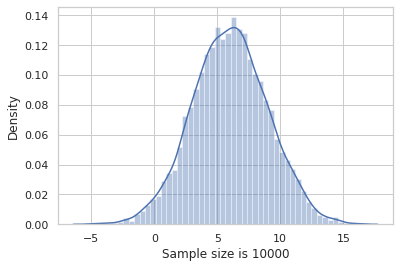

In [ ]:
def gaussian_distribution(mean, standard_dev, size):
  """
  Paramters:
    mean : Mean of the gaussian distribution we want
    standard_dev : Standard deviation of the gaussian distribution we want
    size : Size of the gaussian distribution smaples we want
  Returns :
    Returns gaussian distribution sample and plot of it
  """ 
  gauss = np.random.normal(loc = mean, scale = standard_dev, size = size)
  sns.set_theme(style='whitegrid')
  sns.distplot(gauss,hist=True,axlabel='Sample size is {}'.format(size))
  return gauss

def test_gaussian():
  """
  Gaussian distribution test function
  """
  mean = int(input('Enter the mean of the normal distribution you want: '))
  std = abs(int(input('Enter the standard deviation(Sigma) of the normal distribution you want: ')))
  num_samples =  int(input('Enter the number of samples of the normal distribution you want: '))
  if num_samples<= 1000000:
    gauss = gaussian_distribution(mean,std,num_samples)
  else:
    print('Reduce the num_samples for less computational time')
  
  return gauss

gauss = test_gaussian()


# **Skewness**
Skewness is a measure of asymmetry of a pdf
- If skewness value if negative then pdf is left skewed
- If skewness value is positive then pdf is right skewed
- If skewness value is 0 then pdf is called perfect gaussian distribution

# **Kurtosis**
Kurtosis is a measure of tailedness of a distribution
- If kurtosis value is positive then it is Leptokurtic.
- If kurtosis value is negative then it is Platykurtic.


In [ ]:
class Skewness:
  """
  This is a custom class written to calculate Skewness of a distribution
  """
  def __init__(self,arr):
    self.arr = arr
  
  def skewness_m(self,order):
    n = len(self.arr)
    mean = np.mean(self.arr)
    add = sum([(self.arr[i]-mean)**(order) for i in range(n)])
    add = add/n

    return add

  def skewness_s(self,order_high,order_low):
    n = len(self.arr)
    mean = np.mean(self.arr)
    add = sum([(self.arr[i]-mean)**(order_low) for i in range(n)])
    add = add/(n)
    add = add**(order_high/order_low)

    return add
  
  def skewness(self,order,high_order,low_order):

    return self.skewness_m(order)/self.skewness_s(high_order,low_order)

 
print('Skewness value from scipy library: {}'.format(skew(gauss)))
sk = Skewness(gauss)

print('The value of Skewness calculated using the formula is: {}'.format(sk.skewness(3,3,2))) # These orders should not be changed


Skewness value from scipy library: 0.004765672803444623
The value of Skewness calculated using the formula is: 0.004765672803444594


In [ ]:

class Kurtosis:
  def __init__(self,arr):
    self.arr = arr
  
  def kurtosis_m(self,order):

    n = len(self.arr)
    mean = np.mean(self.arr)
    add = sum([(self.arr[i]-mean)**(order) for i in range(n)])
    add = add/n
    return add

  def kurtosis_s(self,order_high,order_low):
    n = len(self.arr)
    mean = np.mean(self.arr)
    add = sum([(self.arr[i]-mean)**(order_low) for i in range(n)])
    add = add/(n)
    add = add**(order_high)
    return add
  
  def kurtosis(self,order,high_order,low_order):
    return self.kurtosis_m(order)/self.kurtosis_s(high_order,low_order)-3



print('Kurtosis value from scipy library: {}'.format(kurtosis(gauss)))
kt = Kurtosis(gauss)

print('The value of Kurtosis calculated using the formula is: {}'.format(kt.kurtosis(4,2,2)))

Kurtosis value from scipy library: -0.03221891723694004
The value of Kurtosis calculated using the formula is: -0.03221891723694004


# **Standard Normal Variate**
Standard Normal Variate is a distribution which follows normal distribution with a mean of 0 and standard deviation of 1



Enter the number of samples of the normal distribution you want: 10000


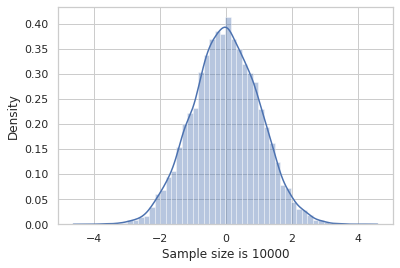

In [ ]:
"""
Standard Normal Variate
""" 
def StandardNormalVariate(mean,standard_dev,size):
  gauss = np.random.normal(loc = mean, scale = standard_dev, size = size)
  sns.set_theme(style='whitegrid')
  sns.distplot(gauss,hist=True,axlabel='Sample size is {}'.format(size))
  return gauss

num_samples =  int(input('Enter the number of samples of the normal distribution you want: '))
if num_samples<= 1000000:
  gauss = StandardNormalVariate(0,1,num_samples) # Do not change the first and second hardcoded value
else:
  print('Reduce the num_samples or else it will take long time to plot the distribution')
  num_samples =  int(input('Enter the number of samples of the normal distribution you want again : '))
  StandardNormalVariate(0,1,num_samples)


# ***Kernel Density Estimation***
Please refer this notebook for better understanding
https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.13-Kernel-Density-Estimation.ipynb#scrollTo=C5YNgr-o_Mbc 

Couldnt Explain Yet


# **K-S Test**

(10000,)


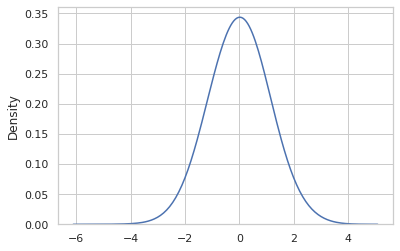

KstestResult(statistic=0.007363710056621564, pvalue=0.6501404840814717)


In [ ]:
# x ~ Normal Distribution

x = np.random.normal(0,1,10000) # Generate random numbers
print(x.shape)
sns.set_style('whitegrid')
sns.kdeplot(np.array(x), bw=0.6)
plt.show()
print(stats.kstest(x, 'norm'))

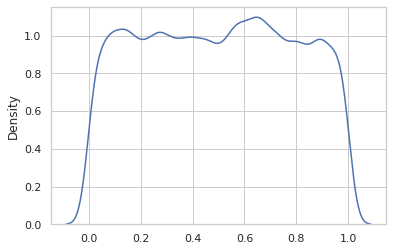

KstestResult(statistic=0.5000191709678194, pvalue=0.0)


In [ ]:
# Y ~ Continous Uniform Distribution(0,1)
y = np.random.uniform(0,1,10000) 
sns.kdeplot(np.array(y), bw=0.1)
plt.show()
print(stats.kstest(y, 'norm'))

# **Quantile Quantile Plot**

- QQ plot is used to know if the the distribution is gaussian or not.

*This process includes* 
- Take the datapoint (Xi)
- Sorting all the datapoints and calculating the percentiles(Xi').
- Sampling few datapoints from a normal distribution.(yi)
- Plot all the Xi' with yi and if most of the (yi,xi') lie on the straight line then it is called as Quantile Quantile plots.


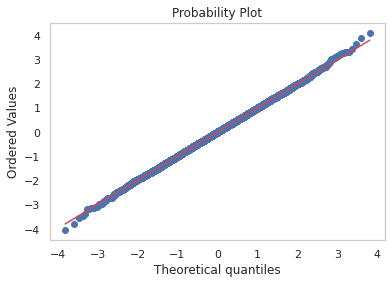

In [ ]:
"""
This is a probability plot for a normal distribution
"""
x = np.random.normal(loc = 0, scale= 1, size = 10000)
stats.probplot(x,plot=plt, dist='norm')
plt.title('Probability Plot')
plt.grid()

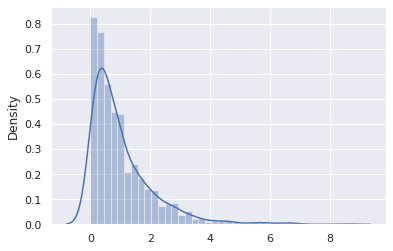

In [ ]:
"""
This is a histogram of a exponential distribution
"""
# Ref: #https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.exponential.html
# real-world example: "The time it takes before your next telephone call" ---Wiki [https://en.wikipedia.org/wiki/Exponential_distribution#Occurrence_and_applications]
x = np.random.exponential(scale=1.0, size=1000) # scale a.k.a lambda on wiki [https://en.wikipedia.org/wiki/Exponential_distribution]
sns.set()
ax = sns.distplot(x)
plt.show()


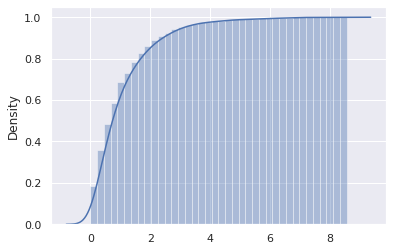

In [ ]:
"""
CDF of a exponential distribution 
"""
# plot CDF(X)
kwargs = {'cumulative': True}
sns.distplot(x, hist_kws=kwargs, kde_kws=kwargs)

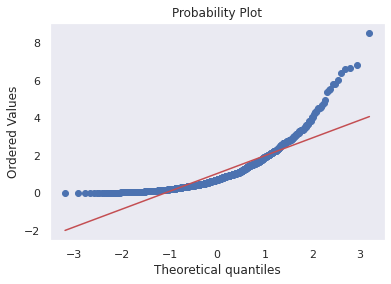

In [ ]:
"""
You can see that the probability plot of a exponential function deviates from the straight line
"""
#QQ-Plot
stats.probplot(x, dist="norm", plot=plt)
plt.grid()

# **Box Cox Tranform**

0.25853573205030844


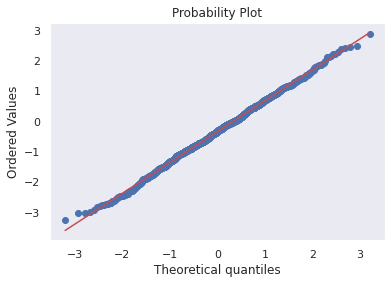

In [ ]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html
x_t, l = stats.boxcox(x) # l=lambda, x_t =x tranformed by box-cox
print(l)

#QQ-Plot
stats.probplot(x_t, dist="norm", plot=plt)
plt.grid()

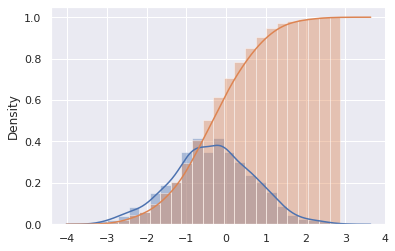

In [ ]:
# PDF of x_t
sns.set()
sns.distplot(x_t)

#CDF of x_t
kwargs = {'cumulative': True}
sns.distplot(x_t, hist_kws=kwargs, kde_kws=kwargs)

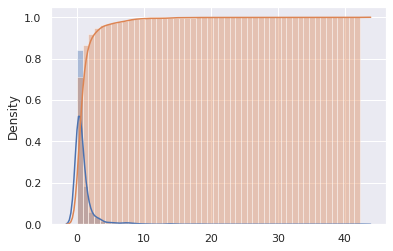

In [ ]:
# Pareto distributed data
# https://docs.scipy.org/doc/numpy-1.14.1/reference/generated/numpy.random.pareto.html
x = np.random.pareto(a=2.0, size=1000) 

# PDF of x
sns.set()
ax = sns.distplot(x)

#CDF of x
kwargs = {'cumulative': True}
sns.distplot(x, hist_kws=kwargs, kde_kws=kwargs)


0.1040874981050039


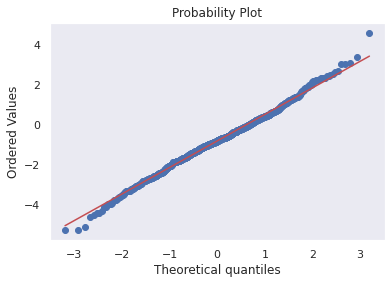

In [ ]:
#Box-cox
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html
x_t, l = stats.boxcox(x) # l=lambda, x_t =x tranformed by box-cox
print(l)

#QQ-Plot
stats.probplot(x_t, dist="norm", plot=plt)
plt.grid()

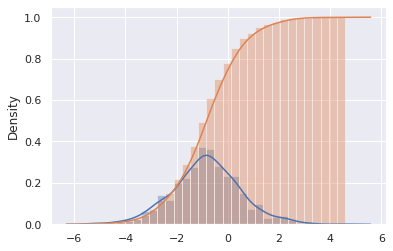

In [ ]:
# PDF of x_t
sns.set()
ax = sns.distplot(x_t)

#CDF of x_t
kwargs = {'cumulative': True}
sns.distplot(x_t, hist_kws=kwargs, kde_kws=kwargs)

# **Covariance**

In [131]:
np.random.seed(100)

def cov(x,y):
  """
  The function takes x and y arrays as a features of and returns the covariance for those features
  """
  a = []
  for i in range(len(x)):
    a.append((x[i] - np.mean(x)) * (y[i] - np.mean(y)))
  Covariance = np.sum(a)/(len(x)-1)
  
  return Covariance
  

x = np.random.randint(0,100,10)
y = np.random.randint(0,100,10)
Covariance = cov(x,y)
print(f'The covariance value calculated manually is: {Covariance}')
print(f'The covariance value from a numpy library is: {np.cov(x,y)[0,1]}')

The covariance value calculated manually is: -92.28888888888888
The covariance value from a numpy library is: -92.2888888888889
